<a href="https://colab.research.google.com/github/aayanrahman/Lorenz-Curves-Economics/blob/main/EconomicsLorenzHW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import os

In [2]:
# Define the data for each country
countries = ['Bolivia (2008)', 'Mexico (2006)', 'Philippines (2006)', 'Ghana (2006)', 'Vietnam (2006)', 'Pakistan (2005)', 'Belarus (2007)']
data = [
    [2.7, 6.5, 11.0, 18.6, 61.2],
    [3.8, 8.1, 12.4, 19.3, 56.4],
    [5.6, 9.1, 13.7, 21.2, 50.4],
    [5.2, 9.8, 14.8, 21.9, 48.3],
    [7.1, 10.8, 15.2, 21.5, 45.4],
    [9.1, 12.8, 16.3, 21.3, 40.5],
    [8.8, 13.4, 17.5, 22.6, 37.7]
]

In [6]:
# Calculate the Lorenz curves
x = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0])  # Population percentiles
lorenz_curves = []

for country_data in data:
    # Calculate cumulative income percentages
    cumsum = np.cumsum(country_data)
    cumsum = cumsum / cumsum[-1]  # Normalize to get percentages
    cumsum = np.insert(cumsum, 0, 0)  # Add starting point (0,0)

    # Create interpolation function
    f = interp1d(x, cumsum)

    # Generate smooth curve
    x_smooth = np.linspace(0, 1, 100)
    lorenz_curves.append(f(x_smooth))

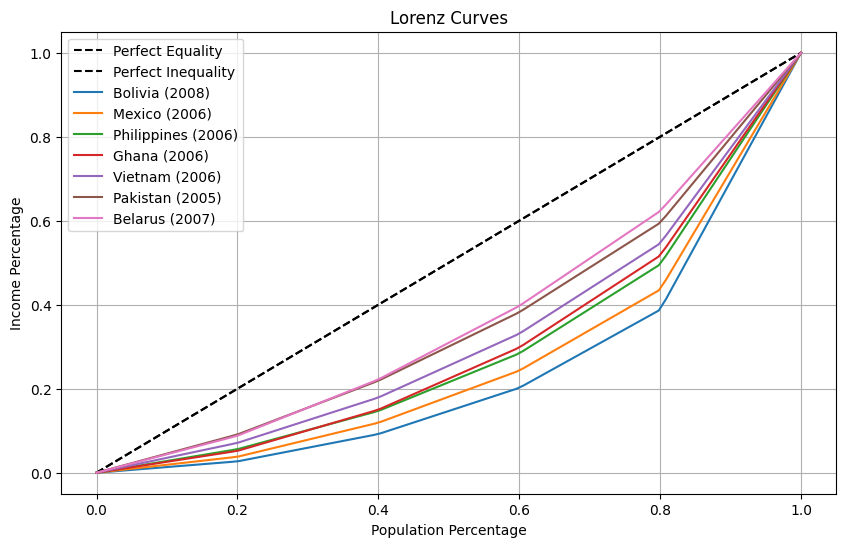

In [7]:
# Plot the curves
plt.figure(figsize=(10, 6))

# Plot perfect equality line
x_smooth = np.linspace(0, 1, 100)
plt.plot(x_smooth, x_smooth, 'k--', label='Perfect Equality')

# Plot perfect inequality line (starts at 0,0 and goes to 0,1 then 1,1)
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Inequality')

# Plot Lorenz curves for each country
for i, country in enumerate(countries):
    plt.plot(x_smooth, lorenz_curves[i], label=country)

plt.xlabel('Population Percentage')
plt.ylabel('Income Percentage')
plt.title('Lorenz Curves')
plt.legend(loc='upper left')
plt.grid(True)

# Save plot
plt.savefig('lorenz_curve.png')
plt.show()